<a href="https://colab.research.google.com/github/Coyote-Schmoyote/sentiment-analysis-ml/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis 
This notebook looks into an Natural Language Processing (NLP) task called "Sentiment Analysis". Sentiment Analysis, also called "opinion mining" helps to determine whether the opinions behind a certain text data is positive, neutral, or negative. Sentiment analysis is often used by businesses to detect the general feeling in social data, such as comments, reviews, social media posts, etc., to understand customers and gradp brand reputation.

## 1. Problem Definition
In this project, we will conduct a sentiment analysis based on movie reviews from IMDB. We will build a machine learning model that will detect wether a review is positive or negative.

## 2. Data
We will use the IMDB Dataset of 50K Movie Reviews (https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) that consists of 50,000 lebeled reviews, 25,000 positive and 25,000 negative.

## 3. Approach
First, we will conduct an Exploratory Data Analysis (EDA), and the proceed to data preprocessing. In NLP, we need to clean and prepare the data, tokenize and lemmatize it, and then convert to numbers. Finally, we will choose a machine learning algorithm and fit it to the data.

## 4. Evaluation
Since sentiment analysis is a classification problem, it uses Precision, Recall, F-score, and Accuracy as its evaluation metric. Generally, when evaluating sentiments, we try to meet 80-85% in Accuracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords

# Machine Learning 
## EDA
First, we need to get acquianted with our data. Let's load it as a `pandas` dataframe and explore it.


In [2]:
data = pd.read_csv("/content/drive/MyDrive/ml-projects/nlp-sentiment-analysis/IMDB_Dataset.csv")

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [5]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
data.shape

(50000, 2)

In [7]:
data.dtypes

review       object
sentiment    object
dtype: object

So, we can see that the data consists of 2 types of data: reviews and sentiments. The `review` columns includes the actual movie reviews made by the users, and the `sentiment` column reveals wether the review was positive or negative. Essentially, `review` column consists the feautresm and `sentiment` column consists the target varibales, or labels for our data. 

There are no missing values, and the total number of reviews is 50,000.

### Data visualization
Now let's visualize our data. There are many different ways we can decide to visualize our data, but for now let's visualize it in 2 ways:
1. Plot the sentiment value distribution (how many poisitive and how many negative reviews there are)
2. Display a sample review

positive    25000
negative    25000
Name: sentiment, dtype: int64


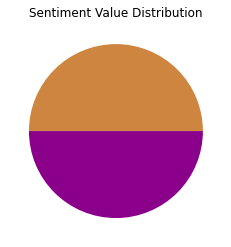

In [9]:
sentiments = data["sentiment"].value_counts()

fig, ax = plt.subplots()
ax.pie(sentiments, colors = ["peru", "darkmagenta"])
ax.set(title="Sentiment Value Distribution");

print(sentiments)

In [11]:
data = data[:25000]

In [12]:
data.shape

(25000, 2)

In [13]:
sample_review = data.review[0]

In [14]:
sample_review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

## Data Cleaning [Example]
One of the most critical parts of creating NLP projects is the proper preprocessing of text data and converting it into a machine-understandable format. The exact word preprocessing strategy may vary from project to project, but the overall workflow is quite similar.
First, we need to clean up our data by removing punctuation (!,? () *), URL, emoji, etc. After we are done cleaning our data, we need to lowercase all the words, and remove the stop words. 

In order to understand the process better, let's first conduct all the steps with our sample review.

#### Clean HTML Tags
In our sample review, we could see some html tags, such as `<br>`. HTML tags, or URLs are not a part of speech, and therefore should be removed from the text. We can achieve that by using a Python library called `Beautiful Soup`. This library allows us to parse and scrape HTML and XML pages. In other words, we can search, navigate, and modify the data.

We will use the function `get_text()` to extract all the text without the HTML tags.


In [15]:
sample_review = BeautifulSoup(sample_review).get_text()
sample_review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

### Clean punctuation and numbers
THe next step is to clean all the unnecessary symbols using Regular Expression Operations, commonly referred to as `regex`. We imported it in `re` module. **Regular Expresiion** is a sequence of characters that specifies a search pattern in a text. For example, a regex `colou?r` matches a string that contains `color` or `colour`. A regex `b[aeiou]bble` matches a string that contains `babble`, `bebble`, `bibble`, `bobble`, or `bubble`. 

In our case, we will use the `re.sub()` function of the module, which replaces matches with a string that we will specify. We will ask the function to replace all punctuation and numbers `[^a-zA-Z]` with an empty space `" "`.

In [16]:
sample_review = re.sub("[^a-zA-Z]", " ", sample_review)
sample_review

'One of the other reviewers has mentioned that after watching just   Oz episode you ll be hooked  They are right  as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wo

### Lowercase
The next step is to convert all our words to lowercase. It is recommended to convert the text to lowercase to ease the preprocessing. If the text is not lowercased, the model might treat the word that begins with a capital letter as a different word from the same word that appears in the text but without a capital letter. However, the decision to lowercase or not to lowercase might depend on the project and on the language. For example, most models in English would benefit from converting the text to lowercase. In German, however, capital letters have gramamtical significance, and therefore might not benefit from turning the text into lowercase. In Japanese, there is no need to lowercase the text, because there are no capital letters. 

In [17]:
sample_review = sample_review.lower()
sample_review

'one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

### Tokenization
After cleaning the data, the next step for most NLP projects is tokenization. Tokenization refers to dividing text into appropriate units. The tool that performs the division of the text is called a tokenizer, and the sentence components resulting from the segmentation are called tokens. In other words, tokenization is a way to break text into smaller segments (tokens). We can break the text into characters, words, or partial words (n-gram). 

In languages like English, the most common way of forming tokens is based on spaces between the words. For example, in the sentence “This is an apple,” the most common way to tokenize this sentence would be by splitting each word and assigning an ID to each token. This - 0, is - 1, an - 2, apple - 3. Alternatively, we can tokenize text by characters, for example, in the word “singing”, character tokens would be s-i-n-g-i-n-g, or by subwords: sing-ing.


There are specialized libraries that can tokenize the text, such as `nltk`, `treebank word tokenizer`, `tweet tokenizer`, `MWET tokenizer`, and `TextBlob`.


The simplest way to tokenize text in English, however, is to use whitespace within a string as the "separator" of the words. This can be accomplished by simply using Python's `split()` function.


In [18]:
sample_review = sample_review.split()

In [19]:
sample_review[:10]

['one',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching']

### Remove stop words
Stop words are the most common words in a language, such as articles, prepositions, pronouns, conjuctions, but they don't add much information. For example, in English, some of the stop words are "the", "a", "so", "what." By removing these words, we are removing the low-level information from out text to give priority to the more important information. Also, removing the stopwords significantly reduces the dataset size, and, consequently, reduces the training time of our model.

In some tasks, such as sentiment analysis, the removal of stop words is not recommended, because a crucial part of information can be lost, resulting in a different meaning. For example, if we have a movie review that says “The movie was not good at all,” after removing stop words, we will get “movie good,” which is the opposite meaning of the original comment. Other tasks, such as classification and clustering, for example, do not need the stop words for proper analysis and therefore can be safely removed. In our case, we conduct a supervised sentiment analysis classification task, and therefore can try removing stop words as a part of our data pre-processing step.


There are many libraries that consist of the stopwords in different languages. For English language stopwords, we can use the `nltk` library.

### NLTK 
Natural Language Processing Kit (NLTK) is a platform for building Python programs that work with text data. It provides a number of tools for text processing, such as classification, tokenization, stemming, tagging, parsing, etc.

In [20]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
words = set(stopwords.words("english"))
sample_review = [word for word in sample_review if word not in words]
sample_review[:10]

['one',
 'reviewers',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened']

## Data cleaning
Now that we understand what each step does, let's combine it into one function, and apply it to all of our reviews.

In [22]:
def clean(reviews):
  reviews = BeautifulSoup(reviews).get_text()
  reviews = re.sub("[^a-zA-Z]", " ", reviews)
  reviews = reviews.lower()
  reviews = reviews.split()
  stop_words = set(stopwords.words("english"))
  reviews = [word for word in reviews if word not in stop_words]
  #join splitted words with space
  return(" ".join(reviews))


In [23]:
data["review"] = data["review"].apply(lambda cw: clean(cw))

In [24]:
data.review[1]

'wonderful little production filming technique unassuming old time bbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great master comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwell murals decorating every surface terribly well done'

### Visualize text data
This is an optional step, but can be implemented for better data visualization. `wordcloud` allows us to plot an image with the most common words in the reviews. First, let's plot a figure with the most common words in all the positive reviews, and then, let's plot a figure with the most common words in. all the negative reviews, so we can visually compare them.

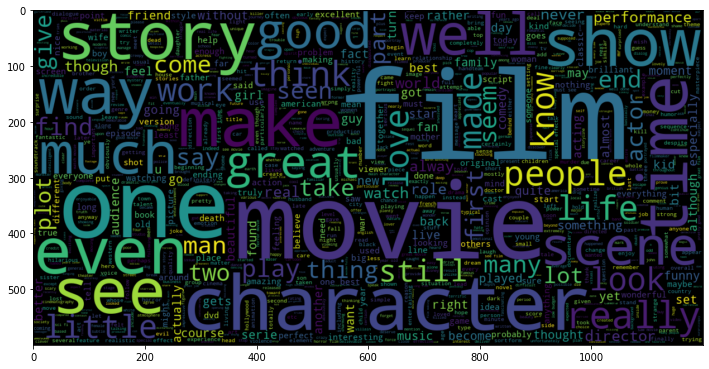

In [25]:
from wordcloud import WordCloud

plt.figure(figsize = (12,12)) # Positive Review Text
wc = WordCloud(max_words = 1000, 
               width = 1200 , 
               height = 600).generate(" ".join(data[data.sentiment == "positive"].review))
plt.imshow(wc , interpolation = 'bilinear');

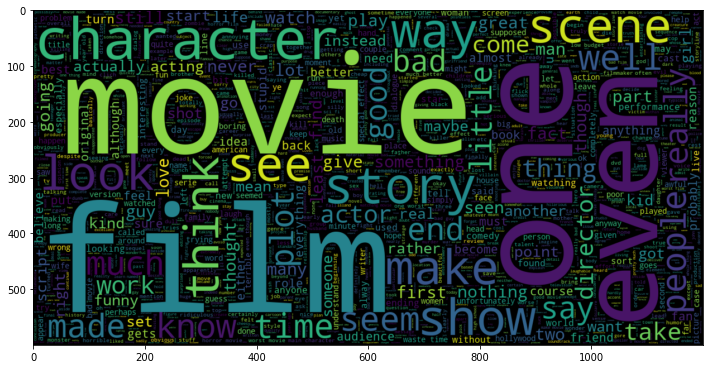

In [23]:
plt.figure(figsize = (12,12)) 
wc = WordCloud(max_words = 2000 , 
               width = 1200 , 
               height = 600).generate(" ".join(data[data.sentiment == "negative"].review))
plt.imshow(wc , interpolation = 'bilinear');

### Stemming and Lemmatization
#### Stemming
For languages like English, after tokenization, the next step in NLP preprocessing pipeline is usually stemming. Stemming is a technique that reduces the words to their root forms. For example, a word "beautifully" can ber stemmed to "beautiful". There are different types of stemming algorithms available in Python‘s NLTK: Porter Stemmer, Snowball Stemmer, Lancaster Stemmer, and Regexp Stemmer, with Porter Stemmer being the most common for the English language. 
#### Lemamtization
Lemmatization is an alternative method of shrinking the vocabulary. Unlike stemming, lemmatization depends on correctly identifying the intended part of speech and the meaning of a word in a sentence. Stemming algorithms work by cutting off the ending or the beginning of a word by taking into account a list of common prefixes and suffixes. Lemmatization, on the other hand, takes into consideration the morphological analysis of the word and bases the decisions on detailed dictionaries. 

#### Which one to choose?
While lemmatization produces more accurate and linguistically-correct results, stemming algorithm is easier, faster, and doesn't require a profound knowledge of linguistics, which often makes it the more popular choice for NLP tasks.



In [26]:
def stemmer(reviews):
  stemmer = nltk.porter.PorterStemmer()
  reviews = " ".join([stemmer.stem(word) for word in reviews.split()])
  return reviews

In [27]:
data["review"] = data["review"].apply(stemmer)

In [28]:
data.review[1]

'wonder littl product film techniqu unassum old time bbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

### Data encoding
#### Word vectorization
Word vectorization, also referred to as "word embedding" is a process of bridging the gap between how humans understand language, and how machines understand language. It is a way of representing words and sentences in a numerical way. There are many ways to perform vectorization, ranging from simple binary term occurrence, like in One-Hot Encoding, to advanced content-aware feature representations, like Word2Vec. There are many options in between, like Bag of Words, TF-IDF, CBOW, GloVe, or Fast Text.

#### One-Hot Encoding
One-hot encoding (also referred to as localist representation) is the simplest method of word vectorization. Each word or token in a text corresponds to a vector element. 
For example, if we have a sentence “The apple is tasty,” the vector size of the sentence would be 4 because there are 5 elements (counting from 0), and each word in a vector would be represented with either 0 or 1, depending on whether it is activated or not. So, if we wanted to activate the word "tasty", our vector representation would look like 0, 0, 0, 1, 0.
The result of a one-hot encoding process is a matrix. The longer the text, the larger the matrix and more zeros, which ends up taking up a large amount of memory to store those non-activated word representations. A matrix with many zeros is called a 'sparse matrix'.

#### Count Vectorization
Count vectorization is a type of One-Hot Encoding. Count Vectorizer creates vectors with the number of dimensions equal to the size of our vocabulary. If the text data features that word, it will be put in one dimension. Every time that same word is encountered again, it will increase the count. Where the algorithm didn't find any words even once, it will leave a 0. As a result, we will have asparse matrix of 0 and 1, in which 1 would mean that the word appeared in the text at least once. 
In this example, we will use Count Vectorization to embed our words.



In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

vectorizer.fit(sample_review)

CountVectorizer()

In [30]:
print("Vocabulary:")
print(vectorizer.vocabulary_)

Vocabulary:
{'one': 82, 'reviewers': 96, 'mentioned': 74, 'watching': 131, 'oz': 85, 'episode': 30, 'hooked': 57, 'right': 97, 'exactly': 32, 'happened': 52, 'first': 39, 'thing': 120, 'struck': 116, 'brutality': 10, 'unflinching': 126, 'scenes': 101, 'violence': 129, 'set': 105, 'word': 133, 'go': 47, 'trust': 123, 'show': 108, 'faint': 37, 'hearted': 54, 'timid': 121, 'pulls': 92, 'punches': 93, 'regards': 95, 'drugs': 26, 'sex': 106, 'hardcore': 53, 'classic': 17, 'use': 127, 'called': 11, 'nickname': 81, 'given': 45, 'oswald': 84, 'maximum': 72, 'security': 104, 'state': 114, 'penitentary': 87, 'focuses': 40, 'mainly': 68, 'emerald': 29, 'city': 15, 'experimental': 34, 'section': 103, 'prison': 90, 'cells': 12, 'glass': 46, 'fronts': 42, 'face': 35, 'inwards': 60, 'privacy': 91, 'high': 55, 'agenda': 1, 'em': 28, 'home': 56, 'many': 71, 'aryans': 5, 'muslims': 77, 'gangstas': 43, 'latinos': 65, 'christians': 14, 'italians': 62, 'irish': 61, 'scuffles': 102, 'death': 23, 'stares': 1

In [31]:
vector = vectorizer.transform(sample_review)

print("Full Vector:")
print(vector.toarray())

Full Vector:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Train-test split

Now that we know how one-hot-encoding-based word vectorization works, let's split our data to train and test sets. It is recommended to do word vectorization after splitting the data to guarantee that the model will not see test data on the training fase. In other words, it prevents test data from leaking into the training dataset.

### Encode the labels
Before splitting our data, let's do one last thing and convert the `sentiment` column, our target variable, to a numeric form, so that a positive review would be marked as `1`, and a negative review as `0`. 
To achieve this, we can use the `preprocessing.LabelEncoder()` from `sklearn` library.

Then, to split our data, we will use our familiar `train_test_split`.

In [32]:
reviews = data["review"].values
labels = data["sentiment"].values

encoder = sklearn.preprocessing.LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [33]:
encoded_labels[:10]

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [34]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(reviews, encoded_labels, 
                                                                            stratify = encoded_labels, 
                                                                            test_size = 0.2, 
                                                                            random_state=11)

### Vectorize all the reviews 
After we split our data, we can now vectorize our train and test reviews.

In [35]:
vectorizer = CountVectorizer(dtype=np.int16)

x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [36]:
x_train[0]

<1x47607 sparse matrix of type '<class 'numpy.int16'>'
	with 68 stored elements in Compressed Sparse Row format>

In [37]:
y_train[:5]

array([1, 1, 0, 1, 1])

In [38]:
# our machine learning models require array for training process, wo let's convert data to array
x_train = x_train.toarray()

In [39]:
x_train[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [40]:
x_train.shape[0], y_train.shape[0]

(20000, 20000)

In [41]:
x_test.shape[0], y_test.shape[0]

(5000, 5000)

In [42]:
# fit model

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
models = []

models.append(("Logistic Regression", LogisticRegression()))
models.append(("Random Forest Classifier", RandomForestClassifier()))

In [45]:
from sklearn.metrics import f1_score, accuracy_score

In [46]:
for name, model in models:
  %time model.fit(x_train, y_train)
  test_pred = model.predict(y_test)
  print(name, "Accuracy Score: " , accuracy_score(y_test, test_pred))
  print(name, "F1 Score:", f1_score(y_test, test_pred))
  print("---------------------------------------------")

CPU times: user 4min 47s, sys: 5.87 s, total: 4min 53s
Wall time: 2min 35s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


ValueError: ignored